**Single Layer LSTM**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6CMWRO/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6CMWRO/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6CMWRO/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
tokenizer = info.features['text'].encoder

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 161s 411ms/step - loss: 0.6586 - accuracy: 0.6126 - val_loss: 0.6488 - val_accuracy: 0.6524
Epoch 2/10
391/391 [==============================] - 156s 399ms/step - loss: 0.5205 - accuracy: 0.7541 - val_loss: 0.5160 - val_accuracy: 0.7688
Epoch 3/10
391/391 [==============================] - 158s 403ms/step - loss: 0.3726 - accuracy: 0.8453 - val_loss: 0.4428 - val_accuracy: 0.8372
Epoch 4/10
391/391 [==============================] - 160s 409ms/step - loss: 0.3996 - accuracy: 0.8377 - val_loss: 0.4533 - val_accuracy: 0.8209
Epoch 5/10
391/391 [==============================] - 158s 405ms/step - loss: 0.3765 - accuracy: 0.8413 - val_loss: 0.4248 - val_accuracy: 0.8277
Epoch 6/10
391/391 [==============================] - 158s 405ms/step - loss: 0.2428 - accuracy: 0.9094 - val_loss: 0.4581 - val_accuracy: 0.8218
Epoch 7/10
391/391 [==============================] - 158s 405ms/step - loss: 0.2081 - accuracy: 0.9257 - val_loss: 0.4719 -

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

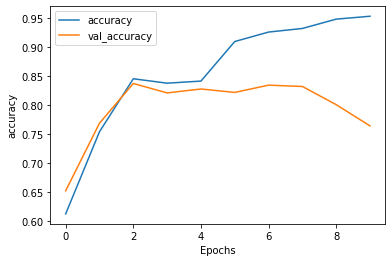

In [0]:
plot_graphs(history, 'accuracy')

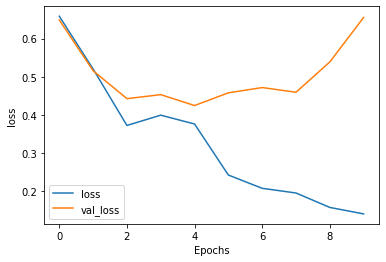

In [0]:
plot_graphs(history, 'loss')

**Multi Layer LSTM**

In [0]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [0]:
NUM_EPOCHS = 10
history2 = model2.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 308s 787ms/step - loss: 0.5398 - accuracy: 0.7212 - val_loss: 0.4849 - val_accuracy: 0.7806
Epoch 2/10
391/391 [==============================] - 298s 763ms/step - loss: 0.5276 - accuracy: 0.7376 - val_loss: 0.6089 - val_accuracy: 0.7174
Epoch 3/10
391/391 [==============================] - 298s 762ms/step - loss: 0.4462 - accuracy: 0.8058 - val_loss: 0.3895 - val_accuracy: 0.8337
Epoch 4/10
391/391 [==============================] - 299s 764ms/step - loss: 0.2939 - accuracy: 0.8889 - val_loss: 0.3608 - val_accuracy: 0.8517
Epoch 5/10
391/391 [==============================] - 300s 768ms/step - loss: 0.2445 - accuracy: 0.9102 - val_loss: 0.3566 - val_accuracy: 0.8588
Epoch 6/10
391/391 [==============================] - 297s 760ms/step - loss: 0.2136 - accuracy: 0.9244 - val_loss: 0.3460 - val_accuracy: 0.8638
Epoch 7/10
391/391 [==============================] - 298s 762ms/step - loss: 0.1769 - accuracy: 0.9395 - val_loss: 0.3436 -

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [0]:
plot_graphs(history2, 'accuracy')

NameError: ignored

In [0]:
plot_graphs(history2, 'loss')